In [1]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [2]:
%matplotlib inline

from gEconpy.classes.model import gEconModel
from gEconpy.classes.transformers import IntervalTransformer
from gEconpy import compile_to_statsmodels
from gEconpy.plotting import plotting as gp


import matplotlib.pyplot as plt
import seaborn as sns
from src.plotting import plot_dfs
from src.gp_plotting import plot_sm_results

import numpy as np
import pandas as pd

import os

from config import plt_config
plt.rcParams.update(plt_config)

load model

In [5]:
from config import mod4_params
mod = gEconModel(os.path.join(MODEL_DIR, 'gEconpy_mod4_rbc_complete.gcn'))
plot_vars = ['Y', 'C', 'L', 'w', 'r']

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	6 parameters
		 4 / 6 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [6]:
# assign parameters
mod.free_param_dict.update(mod4_params)
# mod.free_param_dict

Solvemod4_params

In [7]:
%time mod.steady_state()

Steady state found! Sum of squared residuals is 6.695239551090784e-23
CPU times: total: 203 ms
Wall time: 295 ms


In [8]:
# steady state values
mod.print_steady_state()

A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


In [9]:
mod.solve_model(solver="cycle_reduction")

Solution found, sum of squared residuals:  8.256002816550977e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [10]:
mod.check_bk_condition()
;

Model solution has 2 eigenvalues greater than one in modulus and 2 forward-looking variables.
Blanchard-Kahn condition is satisfied.


''

In [11]:
# policy matrix
mod.T

,A,C,I,K,L,Y,lambda,r,w
A,0.950000,-0.0,-0.0,1.445094e-16,-0.0,-0.0,-0.0,-0.0,-0.0
C,0.309657,0.0,0.0,4.787472e-01,0.0,0.0,0.0,0.0,0.0
I,3.640697,-0.0,-0.0,-5.127277e-01,-0.0,-0.0,-0.0,-0.0,-0.0
K,0.072814,-0.0,-0.0,9.697454e-01,-0.0,-0.0,-0.0,-0.0,-0.0
L,0.206602,0.0,0.0,-1.566471e-01,0.0,0.0,0.0,0.0,0.0
Y,1.084291,0.0,0.0,2.481794e-01,0.0,0.0,0.0,0.0,0.0
lambda,-0.464485,0.0,0.0,-7.181208e-01,0.0,0.0,0.0,0.0,0.0
r,1.084291,0.0,0.0,-7.518206e-01,0.0,0.0,0.0,0.0,0.0
w,0.877689,0.0,0.0,4.048265e-01,0.0,0.0,0.0,0.0,0.0


In [13]:

mod.R

,epsilon_A
A,1.000000
C,0.325955
I,3.832313
K,0.076646
L,0.217476
Y,1.141359
lambda,-0.488932
r,1.141359
w,0.923883


Model stats

''

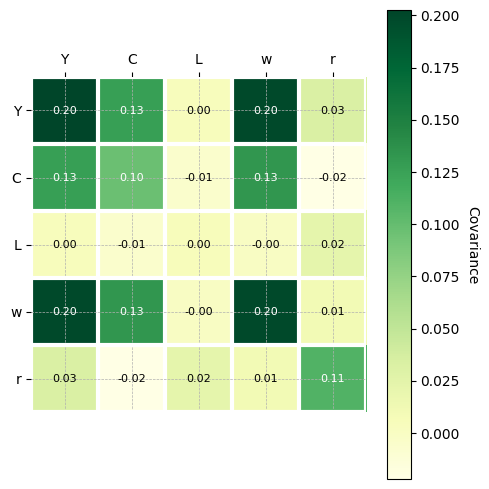

In [16]:
scov = mod.compute_stationary_covariance_matrix()
gp.plot_covariance_matrix(scov, plot_vars,
                          figsize=(5,5))
;

''

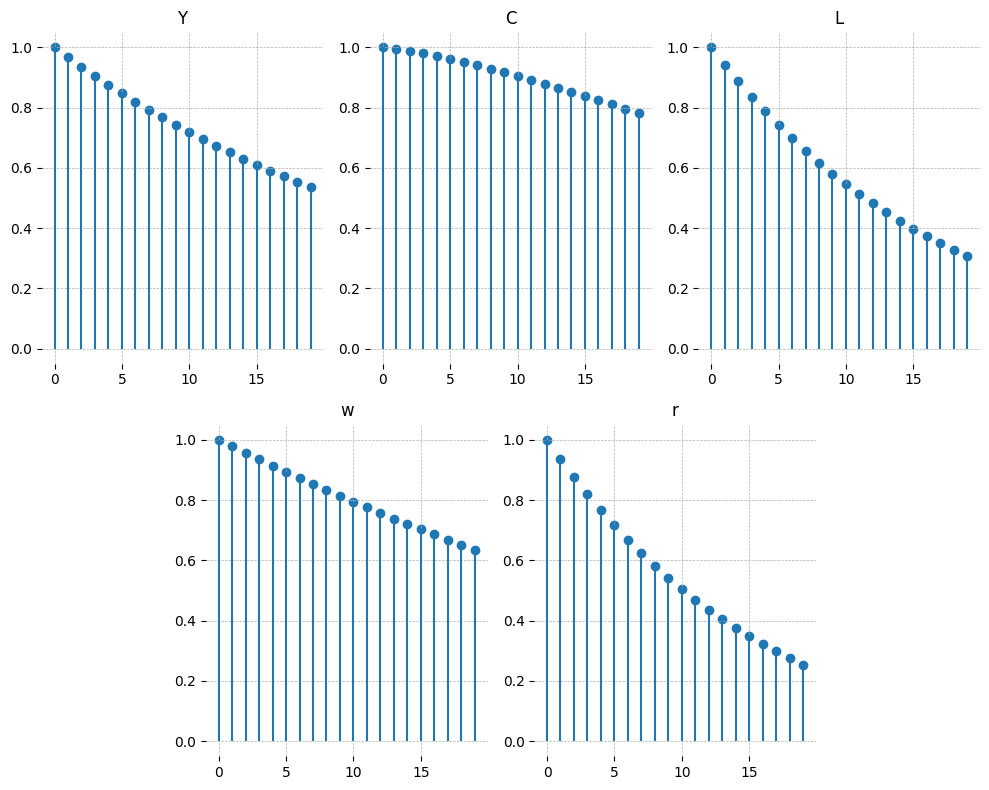

In [17]:
acorr = mod.compute_autocorrelation_matrix(n_lags=20)
gp.plot_acf(acorr, plot_vars, n_cols=3, figsize=(10, 8))
;

IRF

In [19]:
irf = mod.impulse_response_function(simulation_length=120, shock_size=.1)
shocks = list(set([item[1] for item in irf.unstack().index]))
print(f'Shocks are: {shocks}')
_irf1 = irf.copy().unstack().loc[:, "epsilon_A"].unstack()
# _irf2 = irf.copy().unstack().loc[:, "epsilon_Y"].unstack()
# _irf3 = irf.copy().unstack().loc[:, "epsilon_R"].unstack()
# _irf4 = irf.copy().unstack().loc[:, "epsilon_preference"].unstack()

Shocks are: ['epsilon_A']


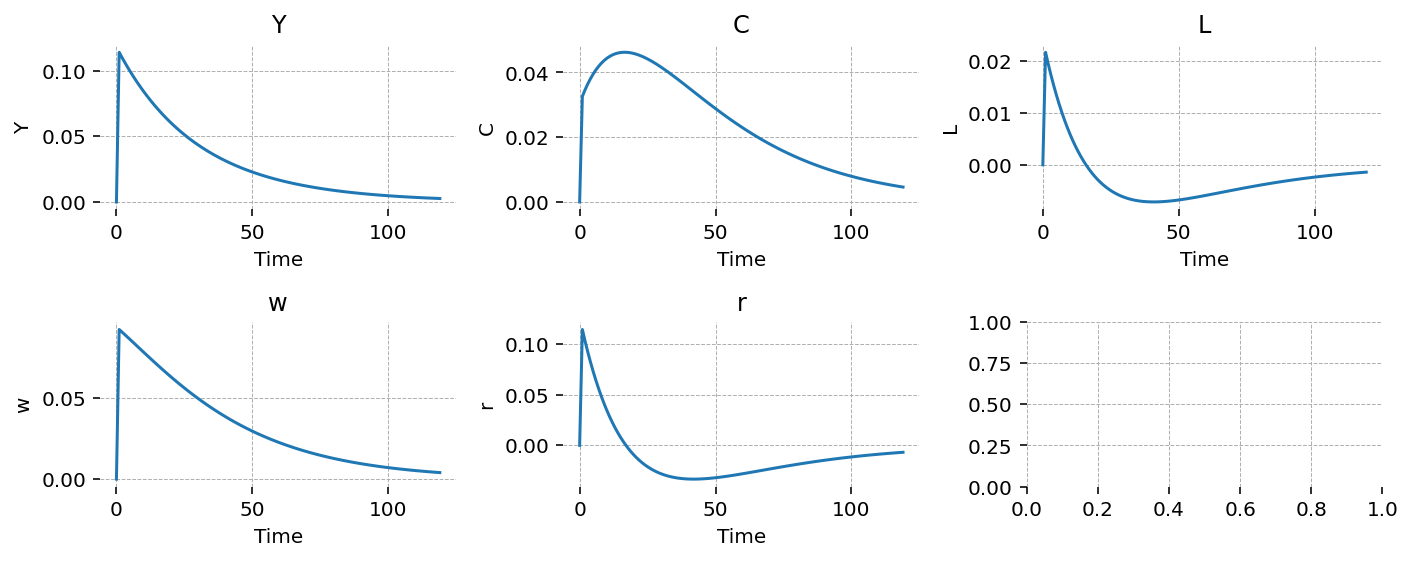

In [20]:
shocks = ['epsilon_A'] #, 'epsilon_R']
plot_dfs([irf.copy().unstack().loc[:, item].unstack()[plot_vars] for item in shocks],
         sns.lineplot,
         figsize=(10, 2),
         legend=shocks)